In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.manifold import trustworthiness

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [3]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM

In [4]:
#Load Data
print("""
    If ticker of Indian Stock Market, add ".NS" at last
    For example -- "ADANIPOWER.NS" for Adani Power
                -- "TATAMOTORS.NS" for Tata Motors
""")


    If ticker of Indian Stock Market, add ".NS" at last
    For example -- "ADANIPOWER.NS" for Adani Power
                -- "TATAMOTORS.NS" for Tata Motors



In [5]:
company = input("Enter ticker symbol :" ).upper()

Enter ticker symbol :CANBK.NS


In [31]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2022,1,1)

In [32]:
data = web.DataReader(company, 'yahoo', start, end)

In [33]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,223.350006,219.800003,222.100006,221.649994,4215881,214.342224
2020-01-02,229.800003,220.949997,222.399994,228.850006,7033453,221.304855
2020-01-03,228.500000,220.649994,227.800003,221.649994,6646941,214.342224
2020-01-06,220.750000,205.600006,220.550003,207.449997,13650687,200.610413
2020-01-07,214.300003,204.699997,213.399994,208.050003,14222549,201.190628
...,...,...,...,...,...,...
2021-12-27,196.500000,186.399994,190.000000,195.600006,10053249,189.151108
2021-12-28,198.449997,195.649994,197.100006,197.850006,5387946,191.326920
2021-12-29,199.449997,195.699997,197.050003,196.699997,5737095,190.214828


In [34]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [35]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,223.350006,219.800003,222.100006,221.649994,4215881,214.342224
2020-01-02,229.800003,220.949997,222.399994,228.850006,7033453,221.304855
2020-01-03,228.500000,220.649994,227.800003,221.649994,6646941,214.342224
2020-01-06,220.750000,205.600006,220.550003,207.449997,13650687,200.610413
2020-01-07,214.300003,204.699997,213.399994,208.050003,14222549,201.190628


In [36]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [38]:
data['2021-07']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,154.949997,151.149994,152.600006,153.600006,10659224,148.535843
2021-07-02,155.699997,153.149994,153.600006,153.750000,7885379,148.680893
2021-07-05,156.500000,153.449997,155.000000,155.800003,9356682,150.663300
2021-07-06,157.000000,153.000000,155.699997,153.500000,8745768,148.439133
2021-07-07,155.149994,152.449997,153.000000,154.550003,5619787,149.454514
2021-07-08,156.350006,150.649994,155.000000,151.800003,8357485,146.795181
2021-07-09,152.300003,150.000000,150.899994,151.199997,6677987,146.214966
2021-07-12,153.850006,151.000000,152.699997,151.750000,7488327,146.746826
2021-07-13,153.699997,151.850006,152.750000,153.350006,5871545,148.294083


In [39]:
data.shape

(499, 6)

In [40]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,499.000000,499.000000,499.000000,499.000000,4.990000e+02,499.000000
mean,143.091583,137.127856,140.200000,139.883267,1.717862e+07,135.271338
std,42.506814,41.389679,42.049114,41.872696,1.314100e+07,40.492160
min,78.300003,73.650002,76.400002,76.099998,7.395820e+05,73.590996
25%,103.275002,99.674999,101.650002,101.375000,8.190566e+06,98.032684
50%,147.899994,142.100006,144.500000,144.449997,1.308984e+07,139.687500
75%,163.750000,158.100006,161.550003,160.850006,2.127153e+07,155.546814
max,247.600006,241.000000,245.000000,244.250000,8.738601e+07,236.197113


In [41]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [42]:
null=np.sum(data.isnull())
null

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [43]:
dataframe=data.copy()
dataframe['Year']=dataframe.index.year
dataframe['Month']=dataframe.index.month
dataframe['Day']=dataframe.index.day_name()
dataframe.head(10)

,High,Low,Open,Close,Volume,Adj Close,Year,Month,Day
Date,,,,,,,,,
2020-01-01,223.350006,219.800003,222.100006,221.649994,4215881,214.342224,2020,1,Wednesday
2020-01-02,229.800003,220.949997,222.399994,228.850006,7033453,221.304855,2020,1,Thursday
2020-01-03,228.500000,220.649994,227.800003,221.649994,6646941,214.342224,2020,1,Friday
2020-01-06,220.750000,205.600006,220.550003,207.449997,13650687,200.610413,2020,1,Monday
2020-01-07,214.300003,204.699997,213.399994,208.050003,14222549,201.190628,2020,1,Tuesday
2020-01-08,209.399994,200.449997,202.500000,207.800003,15141394,200.948868,2020,1,Wednesday
2020-01-09,215.750000,210.750000,213.600006,213.449997,8668763,206.412582,2020,1,Thursday
2020-01-10,218.600006,212.199997,214.100006,214.149994,9320962,207.089508,2020,1,Friday
2020-01-13,216.800003,213.600006,215.000000,216.149994,5888640,209.023560,2020,1,Monday


In [44]:
df3=pd.DataFrame(data['High'].values)
df4 = pd.concat([df3.shift(1), df3], axis=1)
df4.columns = ['Original', 'Lag 1']
df4.head(5)

,Original,Lag 1
0,NaN,223.350006
1,223.350006,229.800003
2,229.800003,228.500000
3,228.500000,220.750000
4,220.750000,214.300003


In [45]:
#Rolling Window Statistics
df6=pd.DataFrame(data['High'].values)
shifted = df6.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
df7 = pd.concat([means, df6], axis=1)
df7.columns=['mean(t-1,t)','t+1']
df7

,"mean(t-1,t)",t+1
0,NaN,223.350006
1,NaN,229.800003
2,226.575005,228.500000
3,229.150002,220.750000
4,224.625000,214.300003
...,...,...
494,202.849998,196.500000
495,199.199997,198.449997
496,197.474998,199.449997
497,198.949997,196.399994


<AxesSubplot:xlabel='Date'>

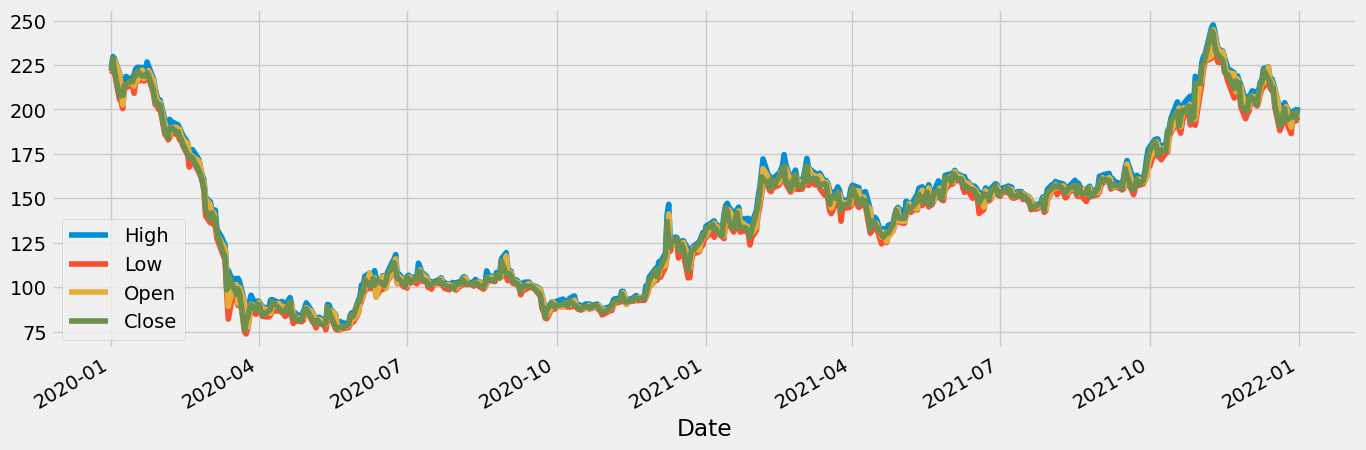

In [46]:
data[['High','Low','Open','Close']].plot(figsize = (15, 5))

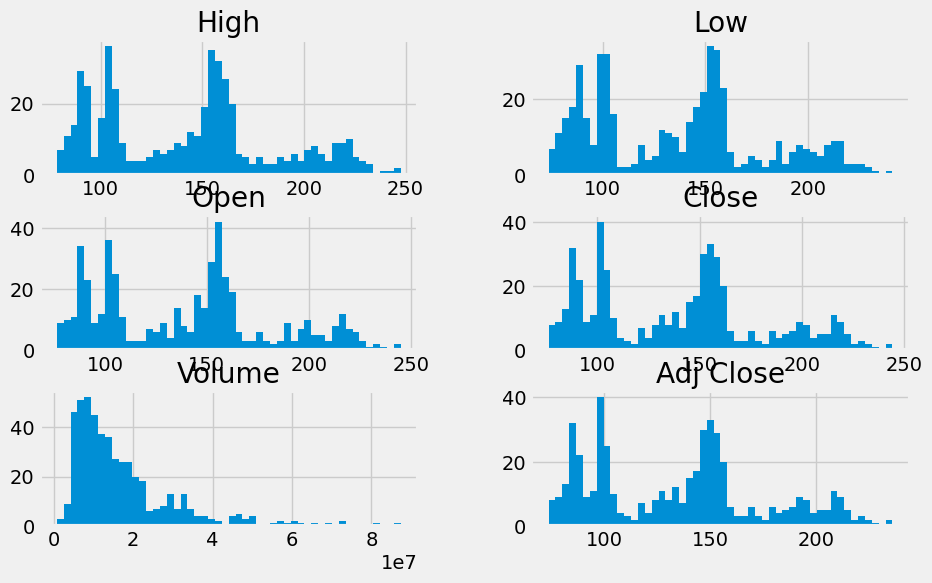

In [47]:
#Histograms
data.hist(bins=50)
plt.show()

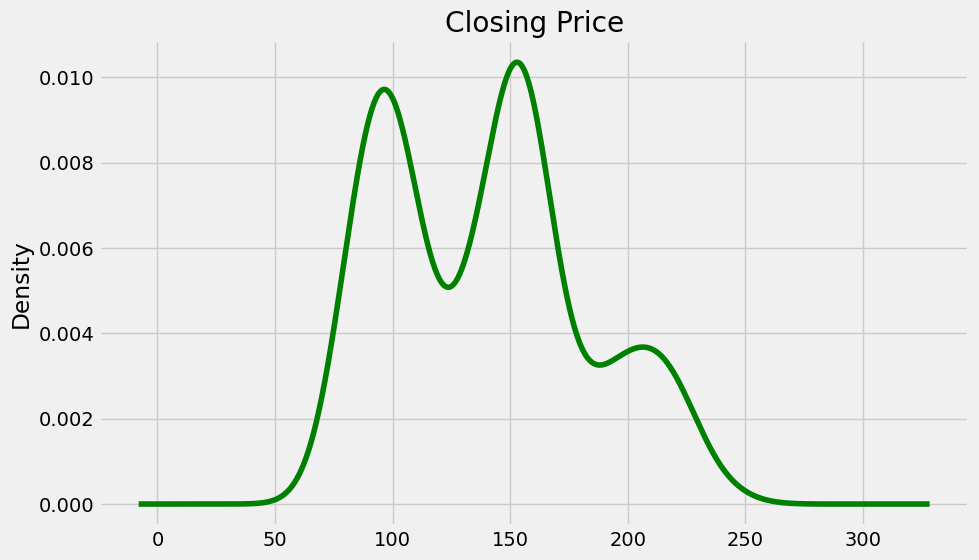

In [48]:
#Density Plot
data.Close.plot.density(color='green')
plt.title('Closing Price')
plt.show()

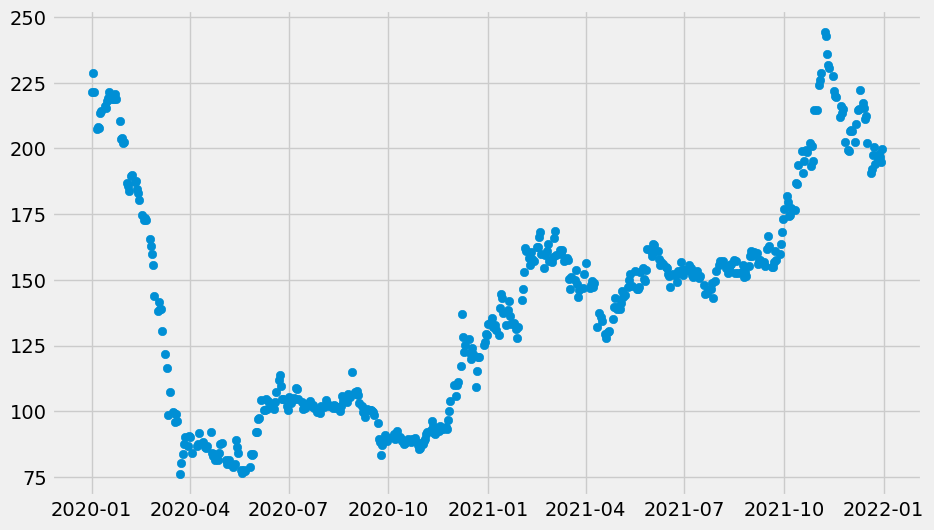

In [49]:
#Scatter plot
plt.scatter(data.index,data['Close'])
plt.show()

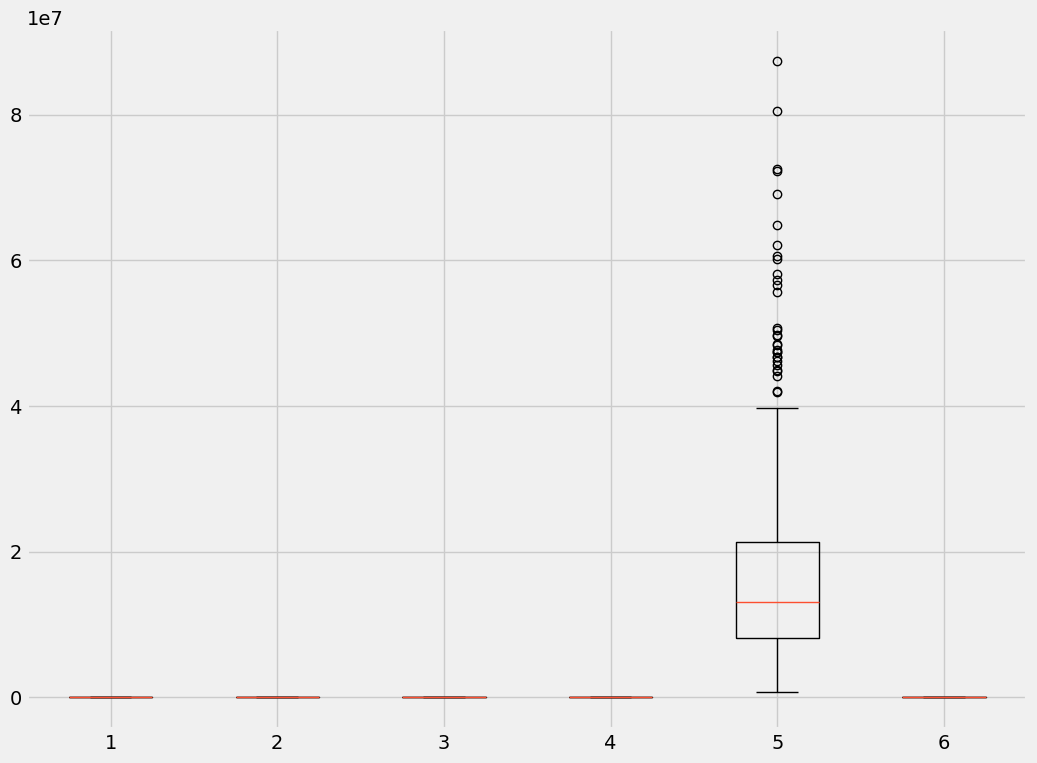

In [51]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

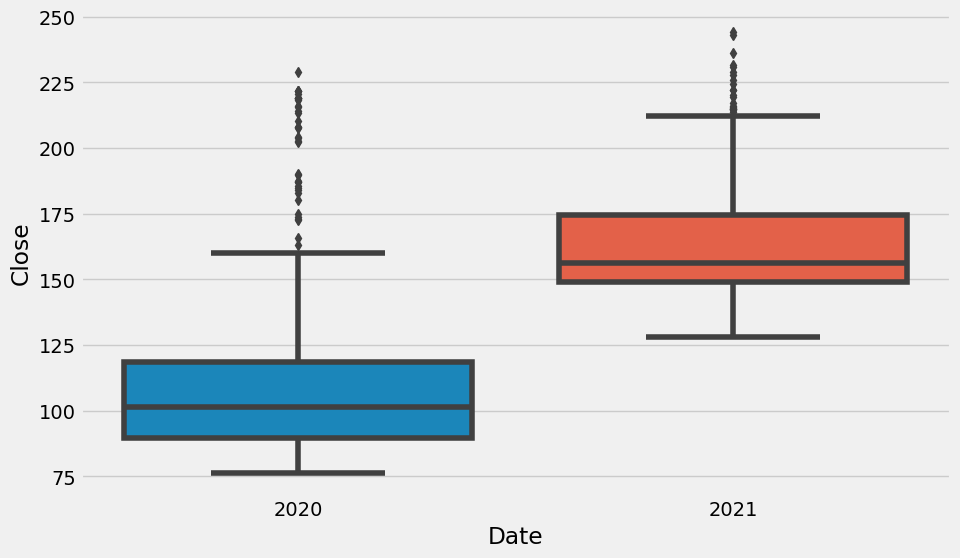

In [52]:
import seaborn as sns
df=pd.DatetimeIndex(data.index).year
ax = sns.boxplot(x=df,y=(data['Close']))

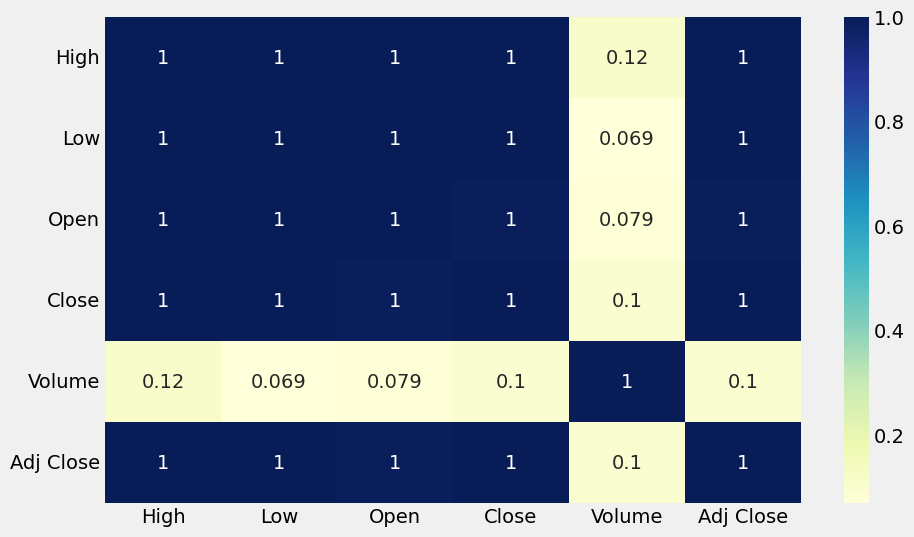

In [53]:
dataplot=sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

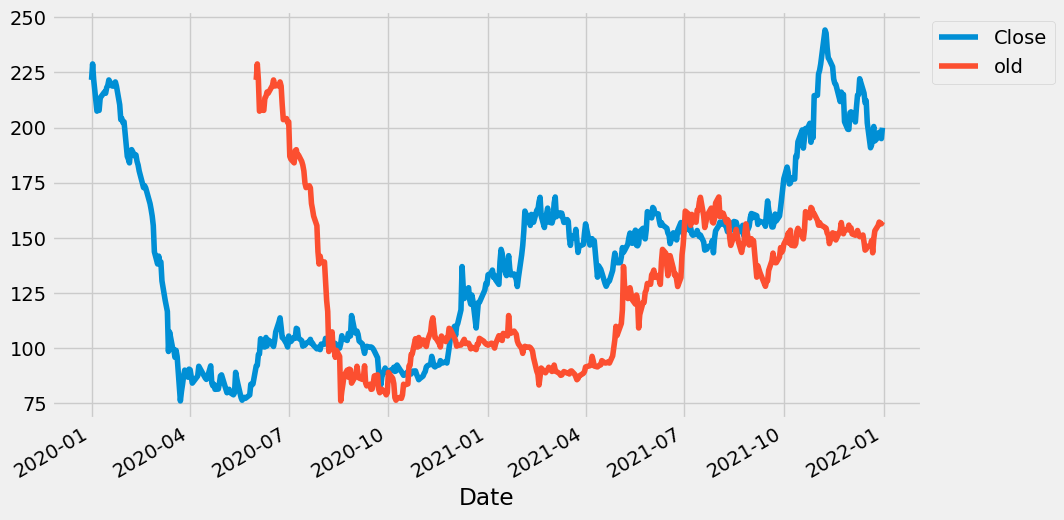

In [54]:
data['Close'].plot()
data['old'] = data['Close'].shift(100)
data['old'].plot()
plt.legend(bbox_to_anchor=(1.0, 1.0))

Text(0.5, 1.0, 'CANBK.NS Autocorrelation plot')

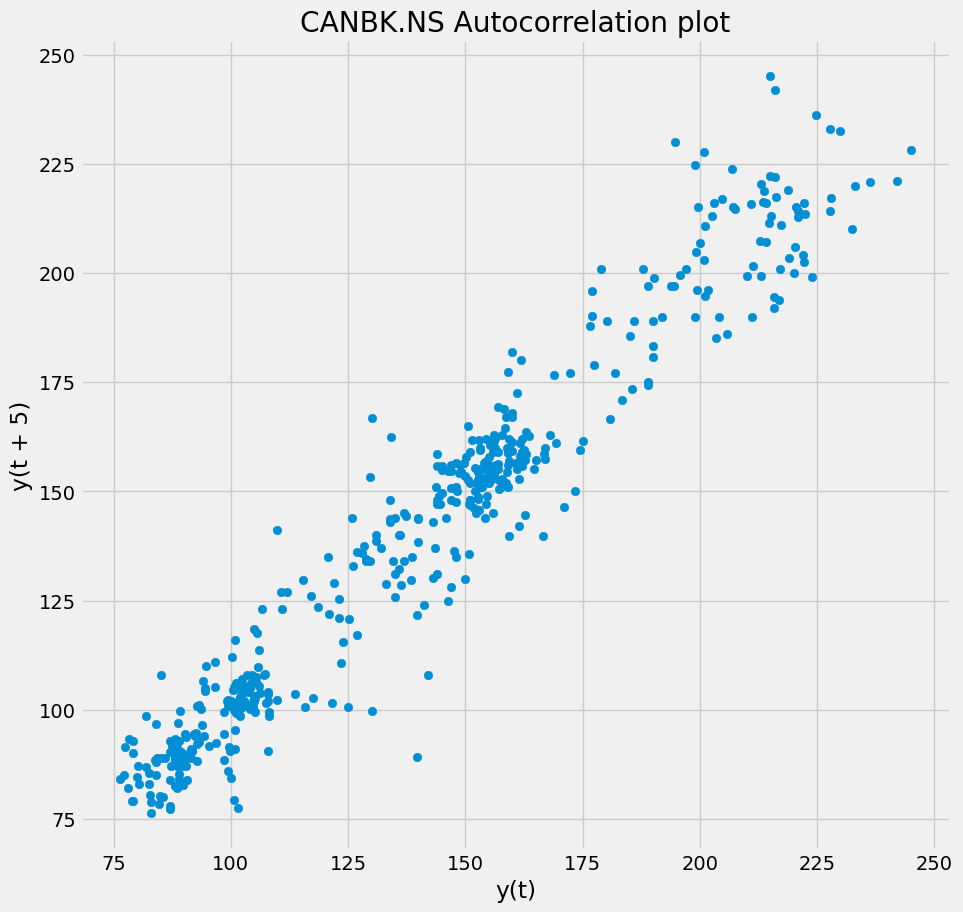

In [55]:
#Autocorrelation Plot
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(data['Open'], lag=5)
plt.title(company+' Autocorrelation plot')

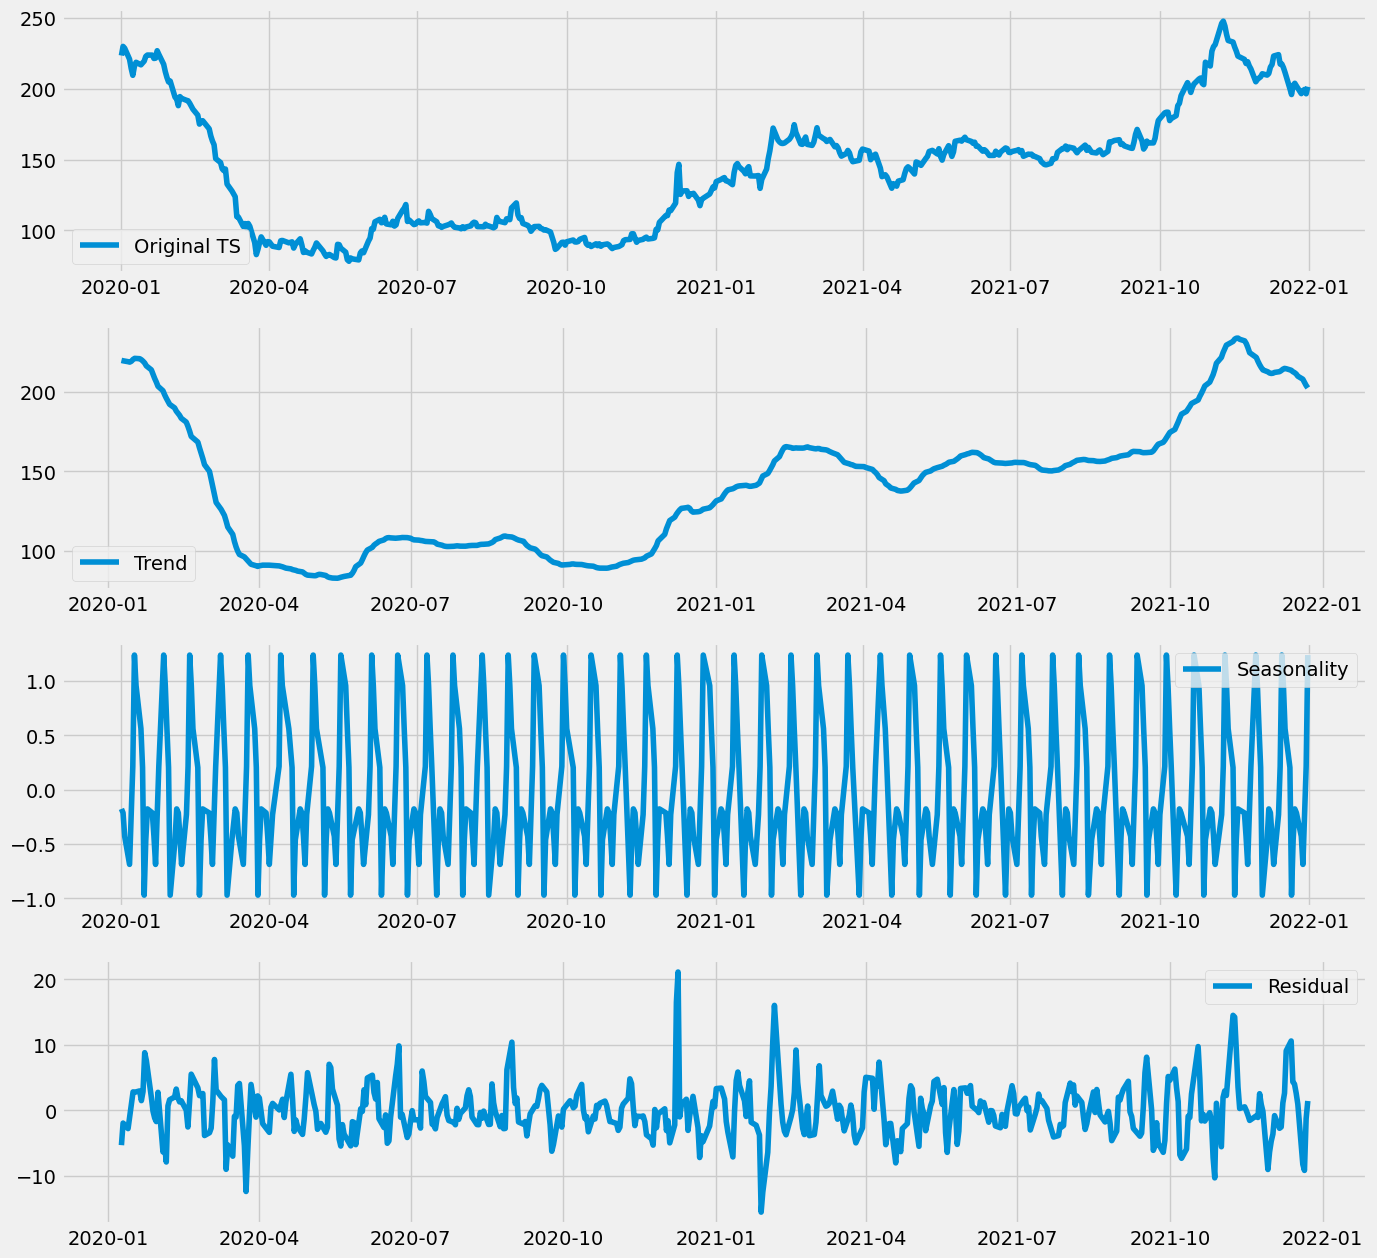

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add=seasonal_decompose(data['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(data['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

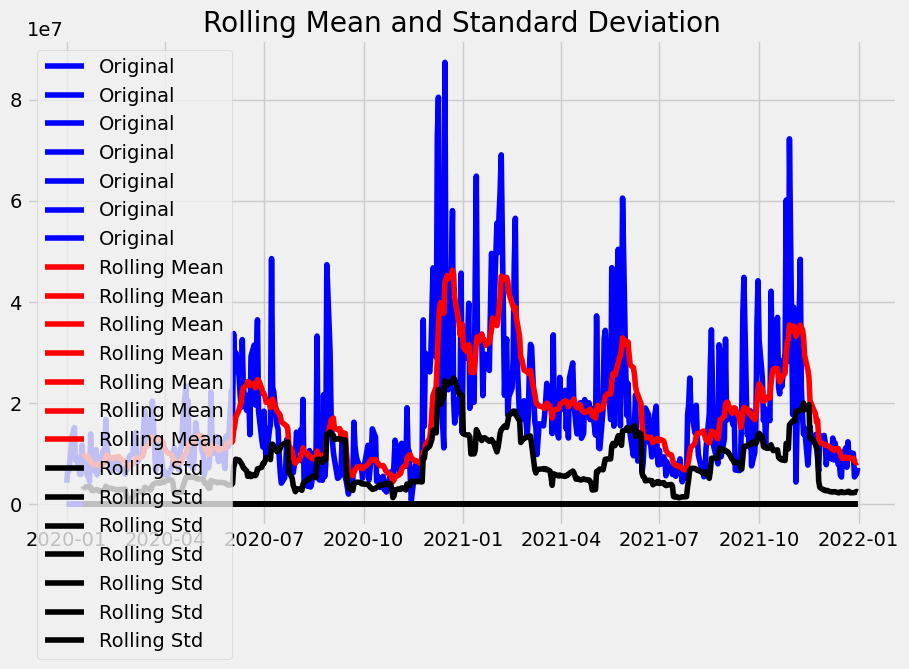

Results of dickey fuller test


ValueError: x is required to have ndim 1 but has ndim 2

In [58]:
#Hypothesis
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data)
#We see that the p-value is greater than 0.05 so we 
#cannot reject the Null hypothesis.

In [59]:
downsampled = data['Close'].resample('W').mean()
print(downsampled.head(15))

Date
2020-01-05    224.049998
2020-01-12    210.179999
2020-01-19    218.110001
2020-01-26    219.279999
2020-02-02    204.590002
2020-02-09    187.239999
2020-02-16    184.550000
2020-02-23    173.474998
2020-03-01    157.519998
2020-03-08    137.679999
2020-03-15    111.050001
2020-03-22     98.000000
2020-03-29     83.520001
2020-04-05     87.924999
2020-04-12     88.666669
Freq: W-SUN, Name: Close, dtype: float64


Date
2020-01-05    224.049998
2020-01-12    210.179999
2020-01-19    218.110001
2020-01-26    219.279999
2020-02-02    204.590002
2020-02-09    187.239999
2020-02-16    184.550000
2020-02-23    173.474998
2020-03-01    157.519998
2020-03-08    137.679999
Freq: W-SUN, Name: Close, dtype: float64
105


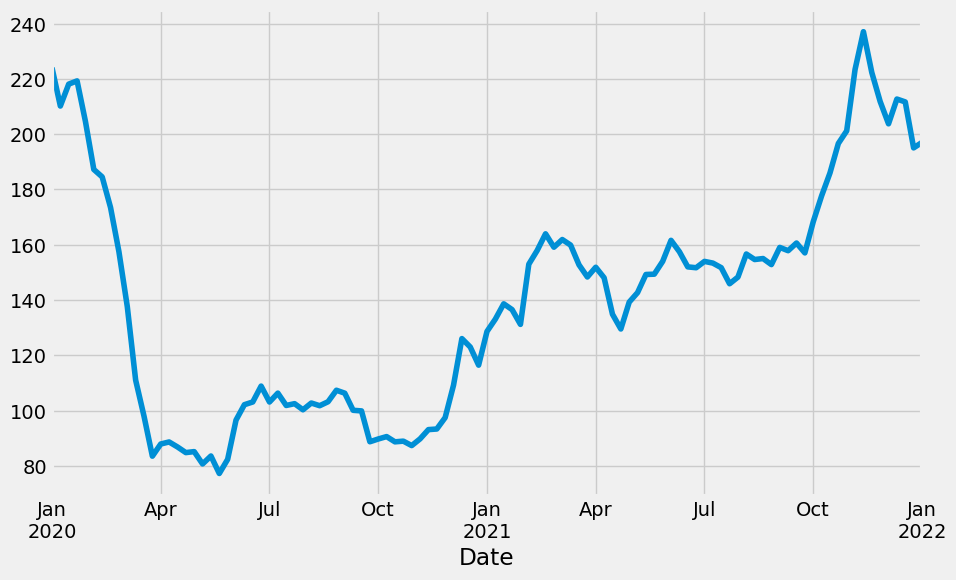

In [60]:
interpolated = downsampled.interpolate(method='spline',order=2)    #used to fill missing values if any 
print(interpolated.head(10))
print(interpolated.size)
interpolated.plot()
plt.show()

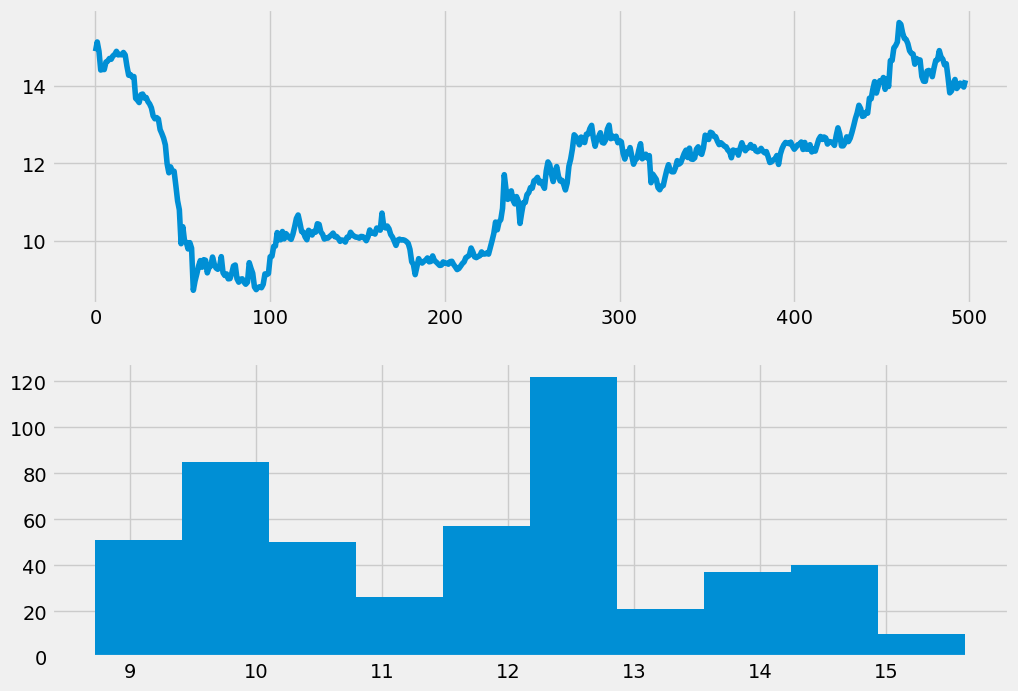

In [62]:
#SQUARE ROOT TRANSFORMATION
temp=np.array(data['Close'])
sqrttemp=np.sqrt(temp)
plt.figure(figsize=(11,8))
plt.subplot(211)
plt.plot(sqrttemp)
plt.subplot(212)
plt.hist(sqrttemp)
plt.show()

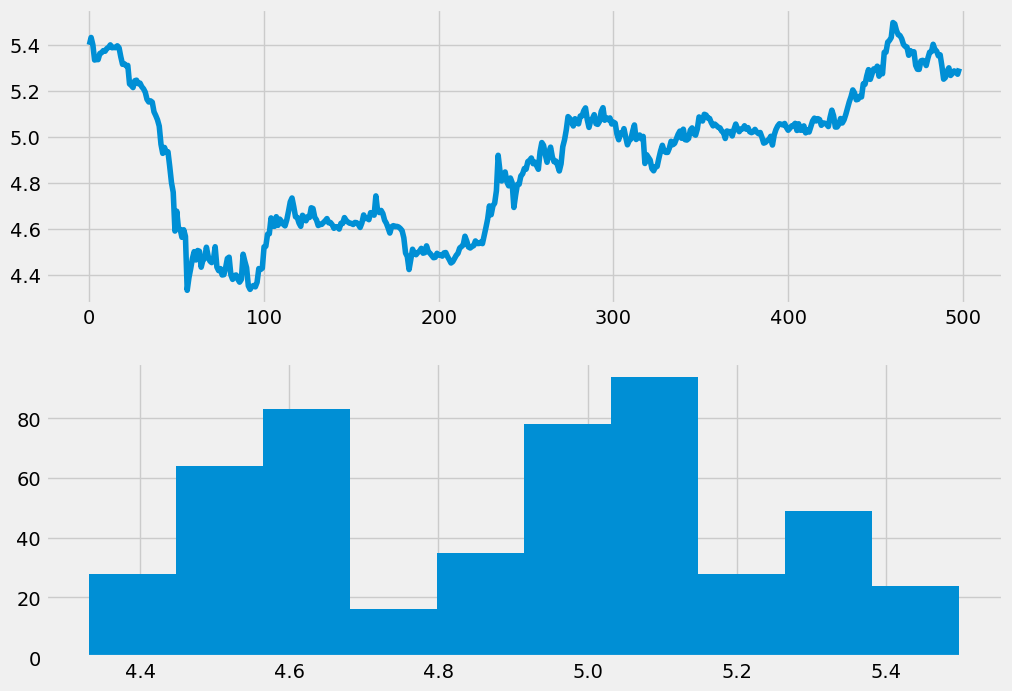

In [63]:
temp2=np.array(data['Close'])
logtemp=np.log(temp2)
plt.figure(figsize=(11,8))
plt.subplot(211)
plt.plot(logtemp)
plt.subplot(212)
plt.hist(logtemp)
plt.show()

In [64]:
#Training
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days = 60
x_train = []
y_train = []

In [65]:
print("Collecting data.....")

In [66]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

In [67]:
#numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [68]:
print("Initializing...")

Initializing...


In [69]:
#Training model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction for next price

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
14/14 [==============================] - 11s 101ms/step - loss: 0.0609
Epoch 2/5
14/14 [==============================] - 1s 94ms/step - loss: 0.0175
Epoch 3/5
14/14 [==============================] - 1s 92ms/step - loss: 0.0101
Epoch 4/5
14/14 [==============================] - 1s 100ms/step - loss: 0.0101
Epoch 5/5
14/14 [==============================] - 1s 99ms/step - loss: 0.0077


In [71]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime(2022,1,1)

In [72]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)
actual_price = test_data['Close'].values

In [73]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [74]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [75]:
# Prediction

x_test = []

print("Predicting...")
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

Predicting...


In [76]:
# Prediction for next day


real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction {prediction} ")

Prediction [[196.94884]] 


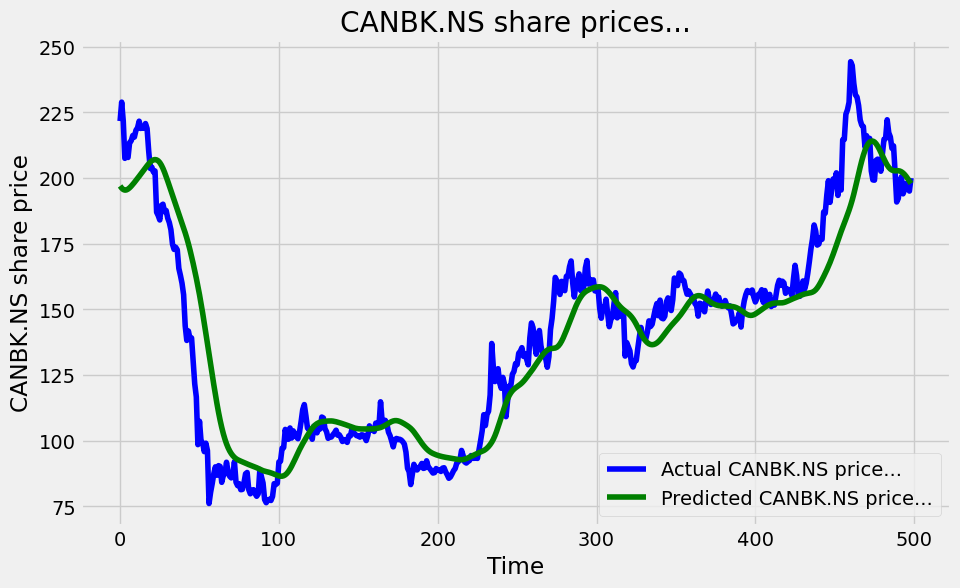

In [77]:
#plot
plt.plot(actual_price, color="blue", label=f"Actual {company} price...")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} price...")
plt.title(f'{company} share prices...')
plt.xlabel("Time")
plt.ylabel(f"{company} share price")
plt.legend()
plt.show()